In [234]:
#Import your libraries

from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import folium
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, completeness_score, homogeneity_score

In [235]:
data = pd.read_csv(r'C:\Users\ABR\Desktop\ProjetFinal\belib_points_de_recharge_clean2.csv')


In [236]:
data

,ID PDC local_x,Statut du Point de charge,Arrondissement_x,ID Station local,ID Station itinérance,Nom station,Code INSEE commune_x,Type implantation,Nombre point de recharge,Date mise à jour,...,Restriction gabarit,Stationnement 2 roues,Puissance max KW,Horaires,Statut du point de recharge,URL Description Point de charge,Heure mise à jour,Type de chargeur,latitude,longitude
0,FR*V75*E9006*02*3,En service,06e Arrondissement,FR*V75*P9006*02,FRV75P900602,Paris | Rue de Medicis 11,75106.0,Voirie,3,2021-09-23,...,aucune restriction,False,22.0,24/7,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,Prise type EF,48.848240,2.339865
1,FR*V75*E9009*01*2,En service,09e Arrondissement,FR*V75*P9009*01,FRV75P900901,Paris | Boulevard de Clichy 31,75109.0,Voirie,3,2021-09-23,...,aucune restriction,False,4.0,24/7,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,Prise type EF,48.882640,2.335728
2,FR*V75*E9013*04*1,En service,13e Arrondissement,FR*V75*P9013*04,FRV75P901304,Paris | Rue de l'Amiral Mouchez 77,75113.0,Voirie,3,2021-09-23,...,aucune restriction,False,22.0,24/7,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,Prise type EF,48.820850,2.343626
3,FR*V75*E9014*03*3,En service,14e Arrondissement,FR*V75*P9014*03,FRV75P901403,Paris | Boulevard Edgar Quinet 9,75114.0,Voirie,3,2021-09-23,...,aucune restriction,False,22.0,24/7,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,Prise type EF,48.841198,2.323891
4,FR*V75*E9016*06*1,En service,16e Arrondissement,FR*V75*P9016*06,FRV75P901606,Paris | Avenue Victor Hugo 45,75116.0,Voirie,3,2021-09-23,...,aucune restriction,False,22.0,24/7,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,Prise type EF,48.871464,2.289894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,FR*V75*EPX19*16*4,En service,19e Arrondissement,FR*V75*PPX19*16,FRV75PPX1916,Paris | Rue Manin 1,75119.0,Voirie,4,2021-09-23,...,aucune restriction,False,7.0,24/7,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T14:39:06+01:00,Prise type EF,48.876600,2.379018
2069,FR*V75*EPX13*21*2,En service,13e Arrondissement,FR*V75*PPX13*21,FRV75PPX1321,Paris | Avenue D'Ivry 58,75113.0,Voirie,5,2021-12-29,...,aucune restriction,False,7.0,24/7,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:00:02+01:00,Prise type EF,48.824066,2.364308
2070,FR*V75*EPX13*21*3,En service,13e Arrondissement,FR*V75*PPX13*21,FRV75PPX1321,Paris | Avenue D'Ivry 58,75113.0,Voirie,5,2021-12-29,...,aucune restriction,False,7.0,24/7,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:01:05+01:00,Prise type EF,48.824066,2.364308
2071,FR*V75*EHBSAE*PDA*02*1,En service,16e Arrondissement,FR*V75*PHBSAE*PDA,FRV75PHBSAEPDA,Paris | SAEMES Parking Porte d'Auteuil,75116.0,Parking public,15,2022-08-19,...,aucune restriction,False,43.0,24/7,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:06:06+01:00,Prise type 2,48.846973,2.255839


In [237]:
data.corr()

,Code INSEE commune_x,Nombre point de recharge,Paiement CB,Stationnement 2 roues,Puissance max KW,latitude,longitude
Code INSEE commune_x,1.000000,-0.020694,-0.000739,-0.018014,-0.070909,0.202467,-0.021397
Nombre point de recharge,-0.020694,1.000000,0.444837,0.080016,0.415154,-0.017996,-0.055801
Paiement CB,-0.000739,0.444837,1.000000,0.081530,-0.409386,0.025623,-0.029512
Stationnement 2 roues,-0.018014,0.080016,0.081530,1.000000,-0.174102,-0.000446,0.006953
Puissance max KW,-0.070909,0.415154,-0.409386,-0.174102,1.000000,-0.042938,-0.052383
latitude,0.202467,-0.017996,0.025623,-0.000446,-0.042938,1.000000,0.033068
longitude,-0.021397,-0.055801,-0.029512,0.006953,-0.052383,0.033068,1.000000


In [238]:
data['Date mise en service'].replace('unknown',np.nan, inplace=True)

In [239]:
data.dropna(inplace=True)

In [240]:
data['Date mise en service']=pd.to_datetime(data['Date mise en service'], format='%Y/%m/%d')

Dropping columns with low variance and non relevant infos

In [241]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour',
       'Type de chargeur', 'latitude', 'longitude'],
      dtype='object')

In [242]:
data['Statut du point de recharge'].value_counts()

Disponible            1231
Occupé (en charge)     703
Inconnu                 71
En maintenance          27
Name: Statut du point de recharge, dtype: int64

In [243]:
data['Statut du point de recharge'].unique()

array(['En maintenance', 'Inconnu', 'Disponible', 'Occupé (en charge)'],
      dtype=object)

In [244]:
data['Statut du point de recharge'].replace('Inconnu','Occupé (en charge)' , inplace=True)
data['Statut du point de recharge'].replace('En maintenance', 'Occupé (en charge)', inplace=True)

In [245]:
data.drop(columns=['ID PDC local_x', 'Statut du Point de charge',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       
       'Date mise à jour', 'Conditions d\'accès', 'Adresse station_x',
        'Tarification', 'Date mise en service',
       
       'Horaires',
       'URL Description Point de charge', 'Heure mise à jour'], axis=1,inplace=True)

In [246]:
data.dtypes

Arrondissement_x                object
Code INSEE commune_x           float64
Type implantation               object
Nombre point de recharge         int64
Paiement CB                       bool
Accessibilité PMR               object
Restriction gabarit             object
Stationnement 2 roues             bool
Puissance max KW               float64
Statut du point de recharge     object
Type de chargeur                object
latitude                       float64
longitude                      float64
dtype: object

In [247]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Arrondissement_x_encode']=encoder.fit_transform(data['Arrondissement_x'])
data['Type implantation_encode']=encoder.fit_transform(data['Type implantation'])
data['Paiement CB_encode']=encoder.fit_transform(data['Paiement CB'])
data['Accessibilité PMR_encode']=encoder.fit_transform(data['Accessibilité PMR'])
data['Restriction gabarit_encode']=encoder.fit_transform(data['Restriction gabarit'])
data['Stationnement 2 roues_encode']=encoder.fit_transform(data['Stationnement 2 roues'])
data['Statut du point de recharge_encode']=encoder.fit_transform(data['Statut du point de recharge'])
data['Type de chargeur_encode']=encoder.fit_transform(data['Type de chargeur'])

In [248]:
data

,Arrondissement_x,Code INSEE commune_x,Type implantation,Nombre point de recharge,Paiement CB,Accessibilité PMR,Restriction gabarit,Stationnement 2 roues,Puissance max KW,Statut du point de recharge,...,latitude,longitude,Arrondissement_x_encode,Type implantation_encode,Paiement CB_encode,Accessibilité PMR_encode,Restriction gabarit_encode,Stationnement 2 roues_encode,Statut du point de recharge_encode,Type de chargeur_encode
0,06e Arrondissement,75106.0,Voirie,3,False,Non accessible,aucune restriction,False,22.0,Occupé (en charge),...,48.848240,2.339865,1,1,0,0,1,0,1,3
1,09e Arrondissement,75109.0,Voirie,3,False,Non accessible,aucune restriction,False,4.0,Occupé (en charge),...,48.882640,2.335728,4,1,0,0,1,0,1,3
2,13e Arrondissement,75113.0,Voirie,3,False,Non accessible,aucune restriction,False,22.0,Occupé (en charge),...,48.820850,2.343626,8,1,0,0,1,0,1,3
3,14e Arrondissement,75114.0,Voirie,3,False,Non accessible,aucune restriction,False,22.0,Occupé (en charge),...,48.841198,2.323891,9,1,0,0,1,0,1,3
4,16e Arrondissement,75116.0,Voirie,3,False,Non accessible,aucune restriction,False,22.0,Disponible,...,48.871464,2.289894,11,1,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,19e Arrondissement,75119.0,Voirie,4,True,Non accessible,aucune restriction,False,7.0,Disponible,...,48.876600,2.379018,14,1,1,0,1,0,0,3
2069,13e Arrondissement,75113.0,Voirie,5,True,Non accessible,aucune restriction,False,7.0,Disponible,...,48.824066,2.364308,8,1,1,0,1,0,0,3
2070,13e Arrondissement,75113.0,Voirie,5,True,Non accessible,aucune restriction,False,7.0,Occupé (en charge),...,48.824066,2.364308,8,1,1,0,1,0,1,3
2071,16e Arrondissement,75116.0,Parking public,15,True,Non accessible,aucune restriction,False,43.0,Occupé (en charge),...,48.846973,2.255839,11,0,1,0,1,0,1,0


### The KNN Algorithm

### Features Selection

In [249]:

data['Arrondissement_x_encode']=encoder.fit_transform(data['Arrondissement_x'])
data['Type implantation_encode']=encoder.fit_transform(data['Type implantation'])
data['Accessibilité PMR_encode']=encoder.fit_transform(data['Accessibilité PMR'])
data['Stationnement 2 roues_encode']=encoder.fit_transform(data['Stationnement 2 roues'])
data['Statut du point de recharge_encode']=encoder.fit_transform(data['Statut du point de recharge'])
data['Type de chargeur_encode']=encoder.fit_transform(data['Type de chargeur'])

In [250]:
data.dtypes

Arrondissement_x                       object
Code INSEE commune_x                  float64
Type implantation                      object
Nombre point de recharge                int64
Paiement CB                              bool
Accessibilité PMR                      object
Restriction gabarit                    object
Stationnement 2 roues                    bool
Puissance max KW                      float64
Statut du point de recharge            object
Type de chargeur                       object
latitude                              float64
longitude                             float64
Arrondissement_x_encode                 int32
Type implantation_encode                int32
Paiement CB_encode                      int64
Accessibilité PMR_encode                int32
Restriction gabarit_encode              int32
Stationnement 2 roues_encode            int64
Statut du point de recharge_encode      int32
Type de chargeur_encode                 int32
dtype: object

In [251]:
X = data.drop(['Statut du point de recharge_encode','Statut du point de recharge','Arrondissement_x','Type implantation','Paiement CB','Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues','Statut du point de recharge','Type de chargeur'], axis=1)
y = data['Statut du point de recharge_encode']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(2032, 12)
(2032,)


Find the optimal number of features with SFM

In [252]:
X.columns

Index(['Code INSEE commune_x', 'Nombre point de recharge', 'Puissance max KW',
       'latitude', 'longitude', 'Arrondissement_x_encode',
       'Type implantation_encode', 'Paiement CB_encode',
       'Accessibilité PMR_encode', 'Restriction gabarit_encode',
       'Stationnement 2 roues_encode', 'Type de chargeur_encode'],
      dtype='object')

In [253]:
# Find the optimal number of features with SFM
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

SFM = SelectFromModel(estimator=RandomForestClassifier())
s = SFM.fit(X, y)

n_features = s.transform(X).shape[1]
n_features

2

In [254]:
# Get the features names 
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['latitude', 'longitude'], dtype='object')

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
# split dataset with features
X = data[['latitude', 'longitude']]
y = data['Statut du point de recharge_encode']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

------------- 1 -------------------
[[216 154]
 [141  99]]
------------- 2 -------------------
[[320  50]
 [201  39]]
------------- 3 -------------------
[[240 130]
 [162  78]]
------------- 4 -------------------
[[310  60]
 [206  34]]
------------- 5 -------------------
[[264 106]
 [176  64]]
------------- 6 -------------------
[[298  72]
 [200  40]]
------------- 7 -------------------
[[269 101]
 [181  59]]
------------- 8 -------------------
[[307  63]
 [200  40]]
------------- 9 -------------------
[[280  90]
 [184  56]]
------------- 10 -------------------
[[312  58]
 [200  40]]
------------- 11 -------------------
[[280  90]
 [182  58]]
------------- 12 -------------------
[[318  52]
 [212  28]]
------------- 13 -------------------
[[290  80]
 [187  53]]
------------- 14 -------------------
[[318  52]
 [212  28]]
------------- 15 -------------------
[[296  74]
 [199  41]]
------------- 16 -------------------
[[323  47]
 [212  28]]
------------- 17 -------------------
[[293  77]
 

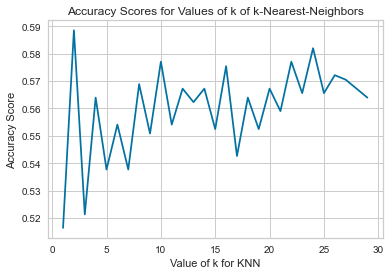

In [257]:
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [258]:
scores

[0.5163934426229508,
 0.5885245901639344,
 0.521311475409836,
 0.5639344262295082,
 0.5377049180327869,
 0.5540983606557377,
 0.5377049180327869,
 0.5688524590163935,
 0.5508196721311476,
 0.5770491803278689,
 0.5540983606557377,
 0.5672131147540984,
 0.5622950819672131,
 0.5672131147540984,
 0.5524590163934426,
 0.5754098360655737,
 0.5426229508196722,
 0.5639344262295082,
 0.5524590163934426,
 0.5672131147540984,
 0.559016393442623,
 0.5770491803278689,
 0.5655737704918032,
 0.5819672131147541,
 0.5655737704918032,
 0.5721311475409836,
 0.5704918032786885,
 0.5672131147540984,
 0.5639344262295082]

In [259]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [260]:
#print accuracy of model
print(metrics.accuracy_score(y_test,y_pred_knn))

0.5885245901639344


In [261]:
y_pred_knn=knn.predict(X_test)

In [262]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[320,  50],
       [201,  39]], dtype=int64)

In [263]:
pd.crosstab(y_test, y_pred_knn)

col_0,0,1
Statut du point de recharge_encode,,
0,320,50
1,201,39


In [264]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


The classification report for KNeighborsClassifier is:
              precision    recall  f1-score   support

           0       0.61      0.86      0.72       370
           1       0.44      0.16      0.24       240

    accuracy                           0.59       610
   macro avg       0.53      0.51      0.48       610
weighted avg       0.54      0.59      0.53       610



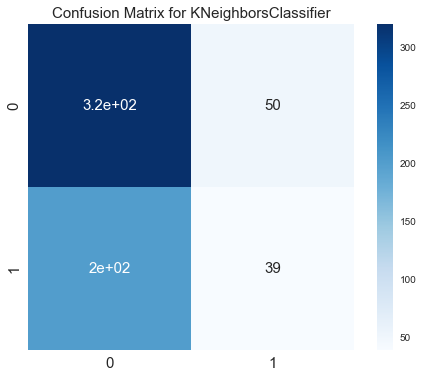

In [265]:
generate_results(knn, y_pred_knn, 'KNeighborsClassifier')

In [268]:
data['Statut du point de recharge'].unique()

array(['Occupé (en charge)', 'Disponible'], dtype=object)

In [269]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_knn)

0.5136824324324325

### TPOT

In [270]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


c:\Users\ABR\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [271]:
from tpot import TPOTClassifier

In [355]:
pipeline_optimizer = TPOTClassifier(generations=20, population_size=20, cv=5,
                                    random_state=42, verbosity=2, mutation_rate=0.7)

In [356]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/420 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6056427955133736

Generation 2 - Current best internal CV score: 0.6056427955133736

Generation 3 - Current best internal CV score: 0.6056427955133736

Generation 4 - Current best internal CV score: 0.6056427955133736

Generation 5 - Current best internal CV score: 0.6062985332182916

Generation 6 - Current best internal CV score: 0.6062985332182916

Generation 7 - Current best internal CV score: 0.6062985332182916

Generation 8 - Current best internal CV score: 0.6076121656600517

Generation 9 - Current best internal CV score: 0.6076121656600517

Generation 10 - Current best internal CV score: 0.6076121656600517

Generation 11 - Current best internal CV score: 0.6076121656600517

Generation 12 - Current best internal CV score: 0.6076121656600517

Generation 13 - Current best internal CV score: 0.6076121656600517

Generation 14 - Current best internal CV score: 0.6076121656600517

Generation 15 - Current best internal CV score: 0.607612

TPOTClassifier(generations=20, mutation_rate=0.7, population_size=20,
               random_state=42, verbosity=2)

# ExtraTreesClassifier

In [274]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [277]:
# split dataset with features
X = data[['latitude', 'longitude']]
y = data['Statut du point de recharge_encode']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [278]:
clf = ExtraTreesClassifier(n_estimators=100)
print(clf)

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=0.8500000000000001, min_samples_leaf=10, min_samples_split=19, n_estimators=100) 

ExtraTreesClassifier()


ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                     max_features=0.8500000000000001, min_samples_leaf=10,
                     min_samples_split=19)

In [294]:
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("Score: ", score)

Score:  0.5639344262295082


We can also apply a cross-validation method to the model and check the training accuracy.

In [295]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5 )
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.53



Predicting and accuracy check

Now, we can predict the test data by using the trained model. After the prediction, we'll check the accuracy level by using the confusion matrix function.

In [297]:
ypred_xtrees = clf.predict(X_test)

cm = confusion_matrix(y_test, ypred_xtrees)
print(cm)

[[280  90]
 [176  64]]



The classification report for ExtraTreesClassifier is:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68       370
           1       0.42      0.27      0.32       240

    accuracy                           0.56       610
   macro avg       0.51      0.51      0.50       610
weighted avg       0.54      0.56      0.54       610



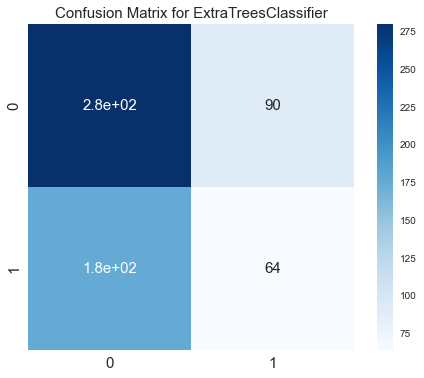

In [298]:
generate_results(clf, ypred_xtrees, 'ExtraTreesClassifier')

### RandomForestClassifier

In [299]:
from sklearn.ensemble import RandomForestClassifier

In [300]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')


The accuracy of the Random Forest Classifier is: 53.77049180327869 %


In [301]:
#print accuracy of model
print(metrics.accuracy_score(y_test, y_pred_rfc))

0.5377049180327869


In [302]:
#print precision value of model
print(metrics.precision_score(y_test, y_pred_rfc))

0.39805825242718446


In [303]:
#print recall value of model
print(metrics.recall_score(y_test,y_pred_rfc))

0.3416666666666667


In [304]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_rfc)

0.5032657657657658

In [305]:
metrics.confusion_matrix(y_test, y_pred_rfc)

array([[246, 124],
       [158,  82]], dtype=int64)


The classification report for RandomForestClassifier is:
              precision    recall  f1-score   support

           0       0.61      0.68      0.65       370
           1       0.41      0.34      0.37       240

    accuracy                           0.55       610
   macro avg       0.51      0.51      0.51       610
weighted avg       0.53      0.55      0.54       610



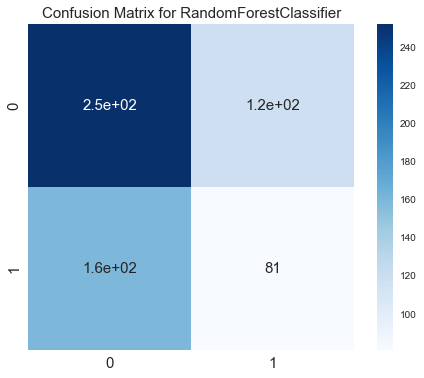

In [291]:
generate_results(rfc, y_pred_rfc, 'RandomForestClassifier')

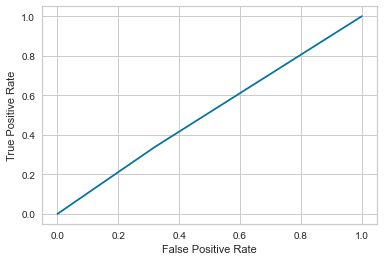

In [292]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

### DecisionTreeClassifier

In [306]:
from sklearn.tree import DecisionTreeClassifier

In [307]:

clf = DecisionTreeClassifier(random_state=0)

In [308]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_dtc * 100, '%')

The accuracy of the Random Forest Classifier is: 56.0655737704918 %


In [309]:
metrics.confusion_matrix(y_test, y_pred_dtc)

array([[279,  91],
       [177,  63]], dtype=int64)


The classification report for DecisionTreeClassifier is:
              precision    recall  f1-score   support

           0       0.61      0.75      0.68       370
           1       0.41      0.26      0.32       240

    accuracy                           0.56       610
   macro avg       0.51      0.51      0.50       610
weighted avg       0.53      0.56      0.54       610



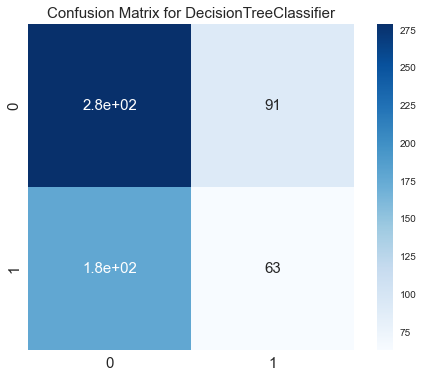

In [310]:
generate_results(rfc, y_pred_dtc, 'DecisionTreeClassifier')

### GaussianNB

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [372]:
# split dataset with features
X = data[['Nombre point de recharge', 'Puissance max KW',       
       'Type implantation_encode', 'Paiement CB_encode',
       'Accessibilité PMR_encode', 'Restriction gabarit_encode',
       'Stationnement 2 roues_encode', 'Type de chargeur_encode']]
y = data['Statut du point de recharge_encode']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [368]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 610 points : 240


In [370]:
metrics.confusion_matrix(y_test, y_pred_gnb)

array([[335,  35],
       [215,  25]], dtype=int64)


The classification report for GaussianNB is:
              precision    recall  f1-score   support

           0       0.61      0.91      0.73       370
           1       0.42      0.10      0.17       240

    accuracy                           0.59       610
   macro avg       0.51      0.50      0.45       610
weighted avg       0.53      0.59      0.51       610



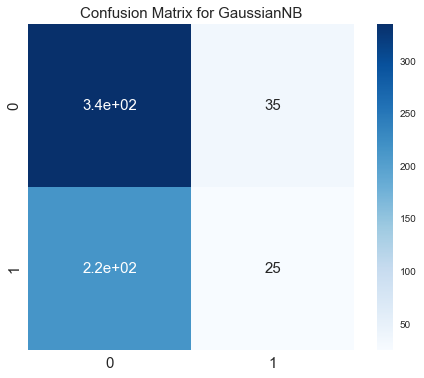

In [369]:
generate_results(gnb, y_pred_gnb, 'GaussianNB')

In [373]:

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=5))             
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Extract score

clf.fit(X_train, y_train).score(X_test, y_test)

0.6062992125984252

In [374]:

y_pred_clf = clf.fit(X_train, y_train).predict(X_test)

c:\Users\ABR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ABR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ABR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classification report for LogisticRegression is:
              precision    recall  f1-score   support

           0       0.61      1.00      0.75       308
           1       0.00      0.00      0.00       200

    accuracy                           0.61       508
   macro avg       0.30      0.50      0.38       508
weighted avg       0.37      0.61      0.46       508



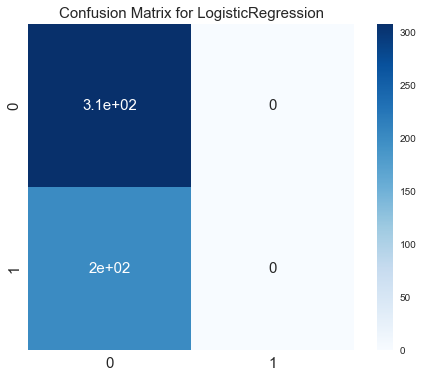

In [375]:
generate_results(clf, y_pred_clf, 'LogisticRegression')